# Collect Data

In [28]:
import threading
import time
import datetime

import shutil

import pyautogui

from pynput.keyboard import Key, Listener
from pynput import mouse 
import logging
import os




output_dir = f"session_{datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}"
print("output_dir", output_dir)


import os

os.makedirs(output_dir)

os.makedirs(f"{output_dir}/images")

# Set up logging to log keystrokes to a file
logging.basicConfig(filename=(f"{output_dir}/keylog.txt"), level=logging.DEBUG, format="%(message)s")


def capture_screenshot(out_dir, key):
    # Capture the screenshot
    screenshot = pyautogui.screenshot()

    output_file = f"{out_dir}/screenshot_{key}.png"
    # Save the screenshot
    screenshot.save(output_file)
    return output_file





global last_ts_now
last_ts_now = datetime.datetime.now()
print("last_ts_now", last_ts_now)

global command_buffer
command_buffer = ""

def heartbeat():
    
    import winsound

    def beep():
        frequency = 500  # Set Frequency To 2500 Hertz
        duration = 777  # Set Duration To 1000 ms == 1 second
        winsound.Beep(frequency, duration)

    sleep_time = 0.5

    while True:
        global last_ts_now
        global command_buffer
        
        
        ts_now = datetime.datetime.now()

        time_difference = ts_now - last_ts_now

        # Convert the difference to milliseconds
        seconds = time_difference.total_seconds()

        

        #term_key = "<key>Key.alt_l  <key>Key.tab"

        #print("seconds", seconds)

        skip_sleep = False
        if seconds > sleep_time:
            if len(command_buffer) > 0:
                ts = ts_now.strftime('%Y-%m-%d_%H-%M-%S.%f')
                
                screenshot_file = f"screen_{ts}"
                
                cb = command_buffer.strip()
                #if term_key not in cb:

                #capture_screenshot(output_dir, screenshot_file)
                file_path = f"{output_dir}/screenshot_current.png"

                if os.path.isfile(file_path):
                    shutil.copyfile(file_path, f"{output_dir}/images/{screenshot_file}.png")
                    logging.info(f"{screenshot_file}\t{str(cb)}")
                    print("Snapshot:", last_ts_now, command_buffer, seconds)
                
                # beep()

                command_buffer = ""
        
            capture_screenshot(output_dir, "current")
        
        if not skip_sleep:
            time.sleep(sleep_time)
        

heartbeat_thread = threading.Thread(target=heartbeat)

heartbeat_thread.start()

# ==========================================================

def update_command_buffer(s):
    global command_buffer
    command_buffer += s
    ts_now = datetime.datetime.now()

    global last_ts_now
    last_ts_now = ts_now


def on_move(x, y):
    # print('Pointer moved to {0}'.format(
    #     (x, y)))
    #update_command_buffer(f" <mouse>on_move({x},{y})")
    pass

def on_click(x, y, button, pressed):
    # print('{0} at {1}'.format(
    #     'Pressed' if pressed else 'Released',
    #     (x, y)))
    
    update_command_buffer(f" <mouse>on_click({x},{y},{button},{pressed})")

    # if not pressed:
    #     # Stop listener
    #     return False

def on_scroll(x, y, dx, dy):
    # print('Scrolled {0} at {1}'.format(
    #     'down' if dy < 0 else 'up',
    #     (x, y)))
    update_command_buffer(f" <mouse>on_scroll({x},{y},{dx},{dy})")





def on_press(key):

    s = f"{key}"
    if len(s) > 0 and s[0] == '\'' and s[-1] == '\'':
        s = s[1:-1]

    tag = ""
    if "Key." in s:
        tag = "key"   
        s = f" <{tag}>{s} "         
    
    update_command_buffer(s)

def start_key_listener():
    # Start listening to keystrokes
    with Listener(on_press=on_press) as listener:
        listener.join()

key_listener_thread = threading.Thread(target=start_key_listener)

key_listener_thread.start()

# Collect events until released
with mouse.Listener(
        on_move=on_move,
        on_click=on_click,
        on_scroll=on_scroll) as listener:
    listener.join()



output_dir session_2024-07-29_14-41-42
last_ts_now 2024-07-29 14:41:42.021132
Snapshot: 2024-07-29 14:41:49.847639  <mouse>on_click(2095,89,Button.left,True) <mouse>on_click(2095,89,Button.left,False) <mouse>on_click(1226,560,Button.left,True) 0.947705
Snapshot: 2024-07-29 14:41:50.067296  <mouse>on_click(1226,560,Button.left,False) 0.574236
Snapshot: 2024-07-29 14:41:55.499179  <mouse>on_click(156,278,Button.left,True) <mouse>on_click(156,278,Button.left,False) 0.68345
Snapshot: 2024-07-29 14:41:57.506782  <mouse>on_click(243,363,Button.left,True) <mouse>on_click(243,363,Button.left,False) <mouse>on_click(243,342,Button.left,True) <mouse>on_click(243,342,Button.left,False) 0.501438
Snapshot: 2024-07-29 14:42:02.768908  <mouse>on_click(2386,78,Button.left,True) <mouse>on_click(2386,78,Button.left,False) 0.598923
Snapshot: 2024-07-29 14:42:10.795609  <mouse>on_click(1714,80,Button.left,True) <mouse>on_click(1714,80,Button.left,False) 0.841462
Snapshot: 2024-07-29 14:42:13.325786  <mouse

### Test the Endpoint

In [9]:
import urllib.request
import json
import os
import ssl

def allowSelfSignedHttps(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True) # this line is needed if you use self-signed certificate in your scoring service.

def test_slm(image_url = "https://raw.githubusercontent.com/ambianic/fall-detection/main/fall_dataset/fall/74.jpg",
                prompt = "What should be the next git command?"):



    # Request data goes here
    # The example below assumes JSON formatting which may be updated
    # depending on the format your endpoint expects.
    # More information can be found here:
    # https://docs.microsoft.com/azure/machine-learning/how-to-deploy-advanced-entry-script
    data = {
            "prompt" : f"<|user|>\n<|image_1|>{prompt}<|end|><|assistant|>\n",
            "image_url" : image_url
        }

    body = str.encode(json.dumps(data))

    url = 'https://finetunedphi3endpointfin.northeurope.inference.ml.azure.com/score'
    # Replace this with the primary/secondary key, AMLToken, or Microsoft Entra ID token for the endpoint
    api_key = 'kgFJl7af3C6RadFJRKDNyWVm2HltUbeu'
    if not api_key:
        raise Exception("A key should be provided to invoke the endpoint")

    # The azureml-model-deployment header will force the request to go to a specific deployment.
    # Remove this header to have the request observe the endpoint traffic rules
    headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key), 'azureml-model-deployment': 'blue' }

    req = urllib.request.Request(url, body, headers)

    try:
        response = urllib.request.urlopen(req)

        result = response.read()
        print(result)
        return result
    except urllib.error.HTTPError as error:
        print("The request failed with status code: " + str(error.code))

        # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
        print(error.info())
        print(error.read().decode("utf8", 'ignore'))


test_slm()

b'[{"0": "\\\\<mouse>on_click(155,1013,Button.left,True)<mouse>on_click(155,1013,Button.left,False)"}]'


b'[{"0": "\\\\<mouse>on_click(155,1013,Button.left,True)<mouse>on_click(155,1013,Button.left,False)"}]'


b'[{"0": "\\\\<mouse>on_click(155,151,Button.left,True)<mouse>on_click(155,151,Button.left,False)"}]'

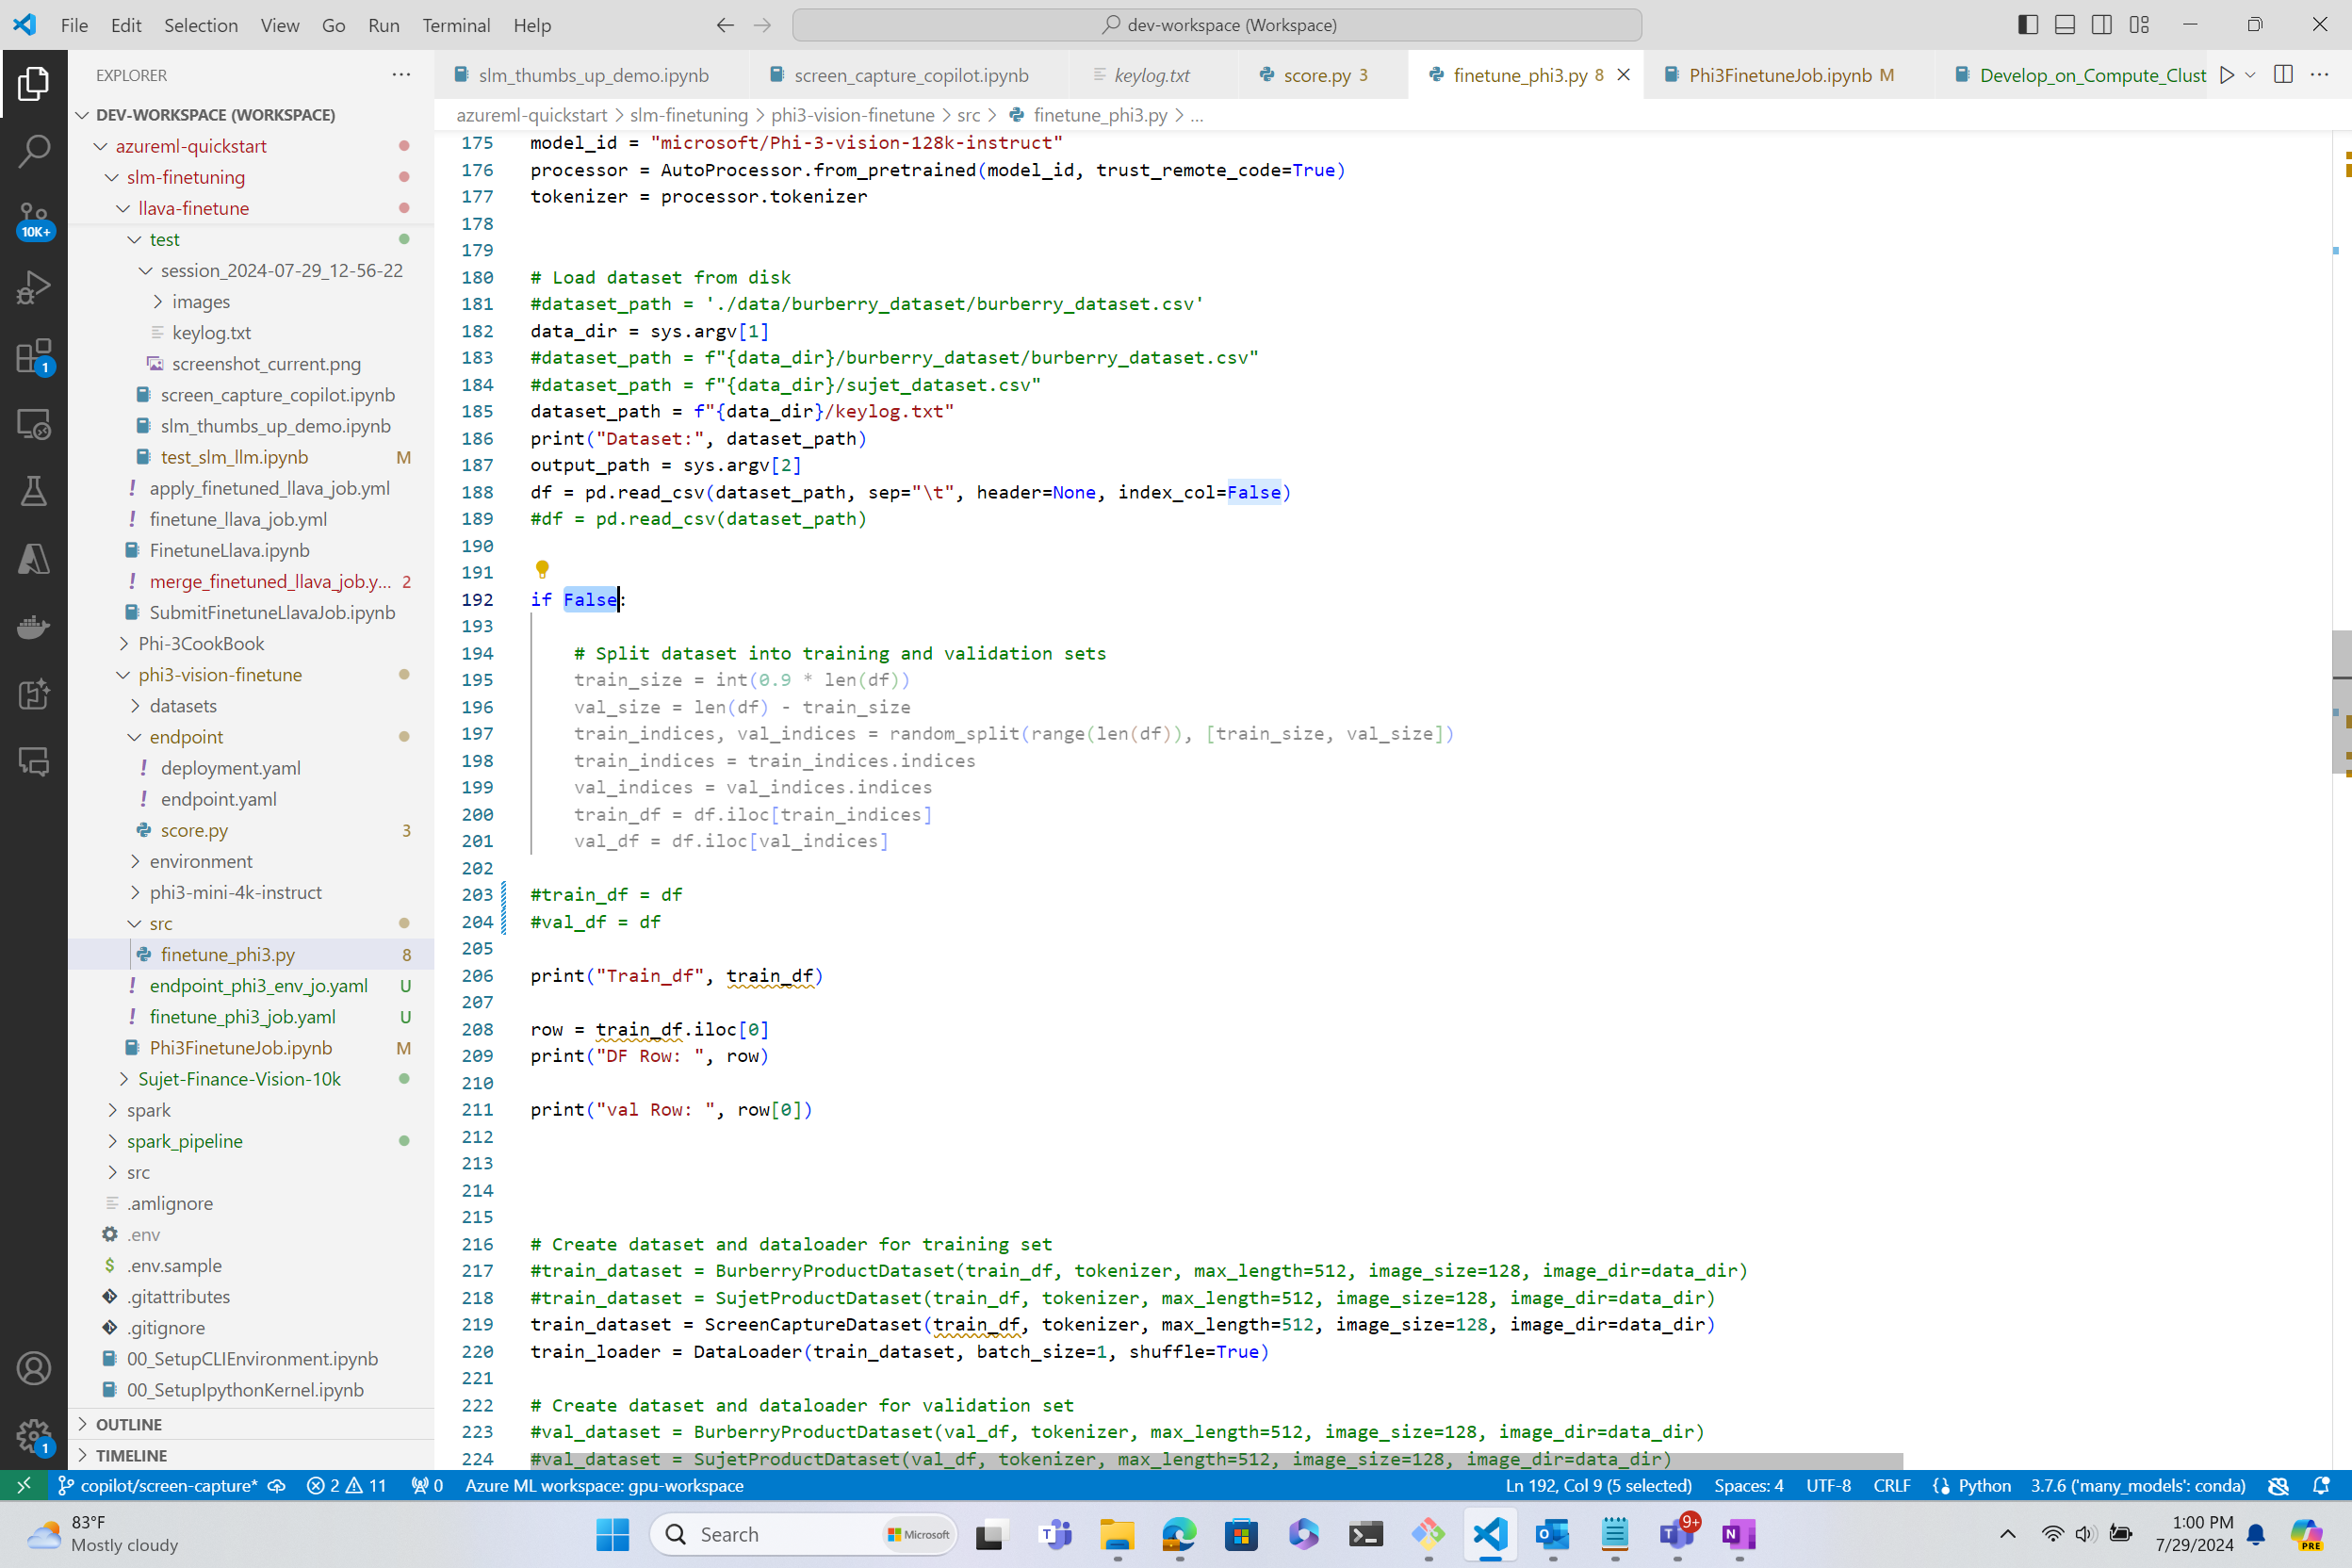

In [10]:

import base64

def encode_image(image_data):
    encoded_string = base64.b64encode(image_data).decode("utf8")
    image_file = 'data:image/jpeg;base64,' + encoded_string
    return image_file

res = ""

with open("C:/Users/antonslutsky/Dev/azureml-quickstart/slm-finetuning/llava-finetune/test/session_2024-07-29_12-56-22/images/screen_2024-07-29_13-00-07.774847.png", "rb") as image_file:
    image_file = encode_image(image_file.read())

    print(image_file)

    res = test_slm(prompt="You are an automation agent that controls keyboard and mouse on a computer screen.  What should be the next keyboard or mouse action?", 
                   image_url=image_file)



b'[{"0": "<mouse>on_click(155,151,Button.left,True)<mouse>on_click(155,151,Button.left,False)"}]'
<mouse>on_click(155,151,Button.left,True)<mouse>on_click(155,151,Button.left,False)

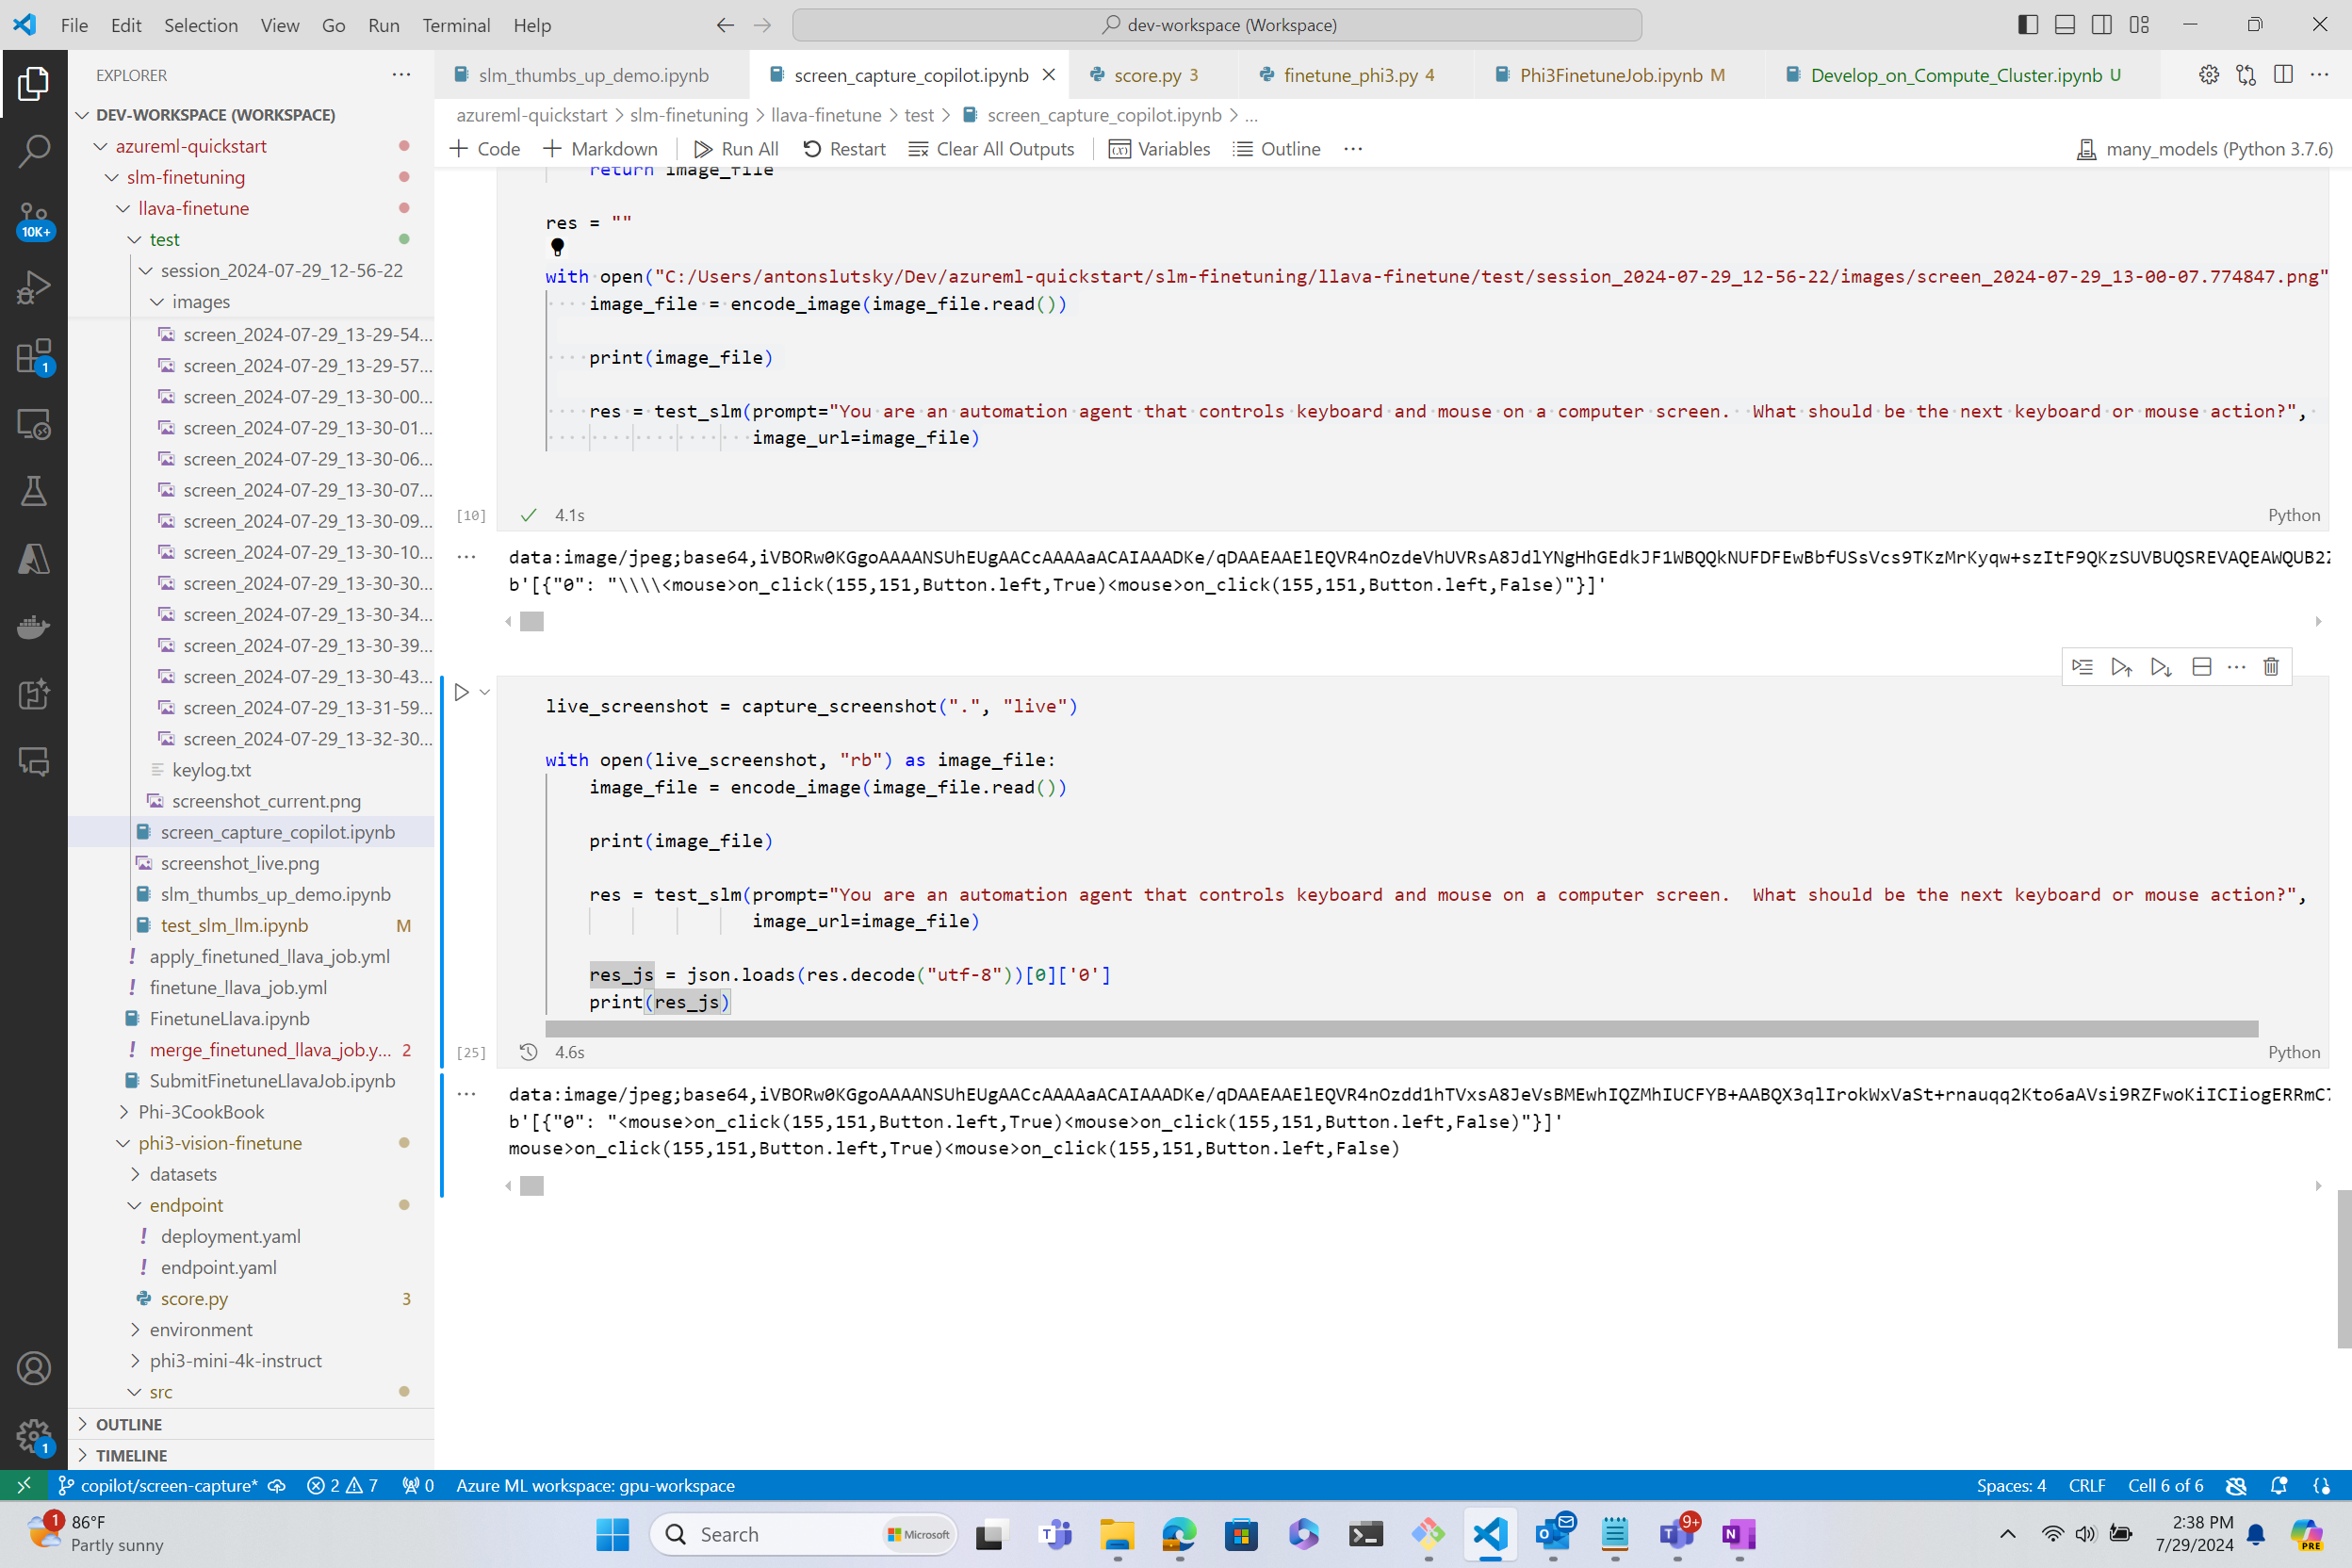

In [26]:



live_screenshot = capture_screenshot(".", "live")

with open(live_screenshot, "rb") as image_file:
    image_file = encode_image(image_file.read())

    print(image_file)

    res = test_slm(prompt="You are an automation agent that controls keyboard and mouse on a computer screen.  What should be the next keyboard or mouse action?", 
                   image_url=image_file)

    res_js = json.loads(res.decode("utf-8"))[0]['0']
    print(res_js)

In [27]:
res_js

'<mouse>on_click(155,151,Button.left,True)<mouse>on_click(155,151,Button.left,False)'